In [ ]:
from time import time, sleep
from clr import AddReference
#import clr reference to link c++ dlls
AddReference(r"C:\Users\Lab\Desktop\pm16\x64\Debug\pm16.dll")
from pm16cpp_ import PM16o

from serial import Serial


SerialException: could not open port 'COM6': FileNotFoundError(2, 'The system cannot find the file specified.', None, 2)

In [ ]:
PM = PM16o()  # creates a PowerMeter Object
PM.connect("USB0::0x1313::0x807B::220214120::0::INSTR")
PM.setWavelength(float(600))

In [ ]:
ser = Serial('COM6',9600, timeout=0.01) # connect to arduino to check wave cycle state
sleep(3)

In [ ]:
T = 5           # total time of ecquisition (s)
dt = 0.1       # time step (s)

list_t = []
list_V = []
list_P = []
t0 = time()
data=""
t_i = 0
t = time()-t0
while t <= T:
    data = ser.readline().decode().strip()
    if t-t_i >= dt:
        t_i = t 
        list_t.append(t)
        list_P.append(PM.measPower())
        list_V.append(int(data))
    t = time.time()-t0



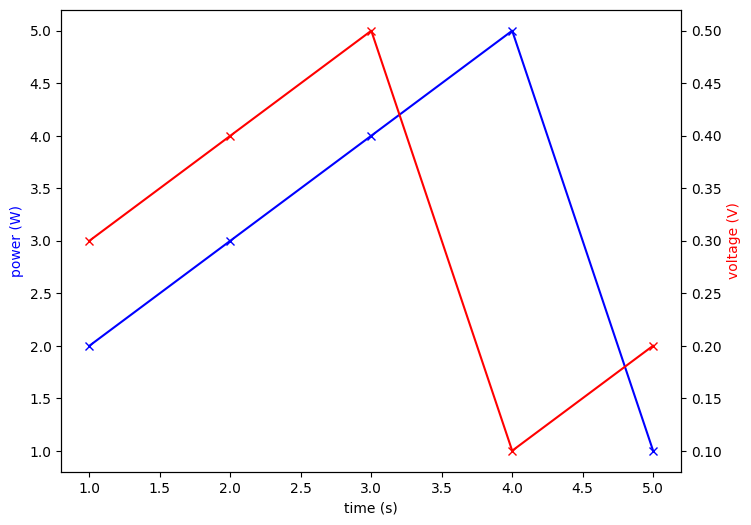

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(list_t,list_P,'x-',color='b')
ax.set_xlabel('time (s)')
ax.set_ylabel('power (W)',color='b')

ax2 = ax.twinx() 
ax2.plot(list_t,list_V,'x-',color='r')
ax2.set_ylabel('voltage (V)',color='r')

plt.show()

In [ ]:
# save txt file
path = "C:\\Users\\Lab\\Desktop\\micro mirrors\\mems_spectrum\\"
name = 'scope_1'
with open(path+name+".txt", 'w') as f:
    f.write("t (s) : power (W) : voltage (V) \n") 
    for idx in range(len(list_t)):
        f.write(f"{list_t[idx]},{list_P[idx]},{list_V[idx]}")
        f.write("\n")
f.close()  